#**Introduction to PyTorch Part 1**

**PyTorch** is strong for **Natural Language Processing** (Transformers, Bert, GPT) and Serious Professional CV Applications. 

It is also for **Academic** Purposes. 

**PyTorch** is overcoming **Tensorflow** in Deep Learning Applications.

But in general, **PyTorch** is more complex than Keras and Tensorflow, but a Deep Learning Scientist/Engineer must keep it in its know-how. 

#**All Imports**

**%matplotlib inline:** sets the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

In [54]:
import os
import platform
import timeit
from PIL import Image
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

#**All Torch Imports**

In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, models

In [56]:
torch.version.__version__

'1.11.0+cu113'

#**All Initializations**

**torch.manual_seed:**Sets the seed for generating random numbers.

In [57]:
torch.manual_seed(4242)

#**Tensors is all you need**

Tensors are the building blocks for representing data in PyTorch. Compared to NumPy arrays, PyTorch **tensors** have a few superpowers, such as the ability to perform very fast operations on graphical processing units (**GPUs**), distribute operations on multiple devices or machines, and keep track of the graph of computations that created them. These are all important features when implementing a modern deep learning library. Basically, A tensor is an array, namely, a data structure that stores a collection of numbers that are accessible individually using an index, and that can be indexed with multiple indices. We know how to deal with vectors of numbers, such as the coordinates of a 2D line, Python lists and vectors. But using the more efficient tensor data structure, many types of data, from images to time series, and even sentences can be represented. By defining operations over tensors, we can slice and manipulate data expressively and efficiently at the same time.

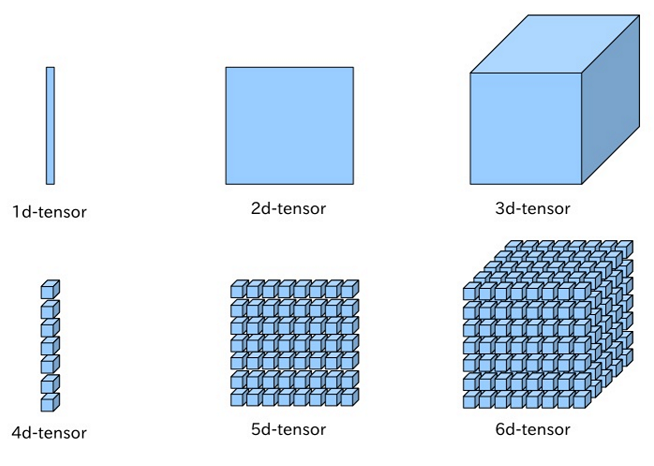

#**Tensors Construction**

In [58]:
a = torch.ones(3)
a

tensor([1., 1., 1.])

In [59]:
a[1]

tensor(1.)

In [60]:
float(a[1])

1.0

In [61]:
a[2] = 2.0
a

tensor([1., 1., 2.])

In [62]:
a = torch.ones(3,3)
a

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [63]:
b = torch.ones(3,3)
b

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [64]:
a + b


tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

In [65]:
a = torch.ones(10000, 10000)
b = torch.ones(10000, 10000)
start_time = timeit.default_timer() 
a+b
print("Elapsed time: ", timeit.default_timer() - start_time)

Elapsed time:  0.1746105389997865


#**More Visibility of Operations**

In [66]:
a = a.to('cuda')
b = b.to('cuda')
a + b

tensor([[2., 2., 2.,  ..., 2., 2., 2.],
        [2., 2., 2.,  ..., 2., 2., 2.],
        [2., 2., 2.,  ..., 2., 2., 2.],
        ...,
        [2., 2., 2.,  ..., 2., 2., 2.],
        [2., 2., 2.,  ..., 2., 2., 2.],
        [2., 2., 2.,  ..., 2., 2., 2.]], device='cuda:0')

In [67]:
a = torch.ones(10000, 10000).to('cuda')
b = torch.ones(10000, 10000).to('cuda')
start_time = timeit.default_timer() 
a+b
print("Elapsed time: ", timeit.default_timer() - start_time)

Elapsed time:  0.00018916800013357715


#**Tensors for Points**

In [68]:
points = torch.zeros(6)
points[0] = 4.0
points[1] = 1.0
points[2] = 5.0
points[3] = 3.0
points[4] = 2.0
points[5] = 1.0
points

tensor([4., 1., 5., 3., 2., 1.])

#**Tensors from Python Lists**

In [69]:
points = torch.tensor([4.0, 1.0, 5.0, 3.0, 2.0, 1.0])
points

tensor([4., 1., 5., 3., 2., 1.])

In [70]:
point_1 = float(points[0]), float(points[1])
point_1

(4.0, 1.0)

In [71]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [72]:
points.shape

torch.Size([3, 2])

In [73]:
points = torch.zeros(3, 2)
points

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

In [74]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [75]:
points[0]

tensor([4., 1.])

#**Indexing Tensors**

In [76]:
points[1:] 

tensor([[5., 3.],
        [2., 1.]])

In [77]:
points[1:, :]

tensor([[5., 3.],
        [2., 1.]])

In [78]:
points[1:, 0]

tensor([5., 2.])

In [79]:
points[None]

tensor([[[4., 1.],
         [5., 3.],
         [2., 1.]]])

#**Images Tensors**

In [80]:
img_t = torch.randn(3, 5, 5) # shape [channels, rows, columns]
img_t

tensor([[[ 0.4056, -0.8689, -0.0773, -1.5630, -2.8012],
         [-1.5059,  0.3972,  1.0852,  0.4997,  3.0616],
         [ 1.6541,  0.0964, -0.8338, -1.6523, -0.8323],
         [-0.1699,  0.0823,  0.3526,  0.6843,  0.2395],
         [ 1.2279, -0.9287, -1.7030,  0.1370,  0.6047]],

        [[ 0.3770, -0.6266,  0.3529,  2.2013, -0.6836],
         [ 0.2477,  1.3127, -0.2260,  0.2622, -1.2974],
         [-0.8140, -0.8404, -0.3490,  0.0130,  1.3123],
         [ 1.7569, -0.3956, -1.8255,  0.1727, -0.3538],
         [ 2.6941,  1.0529,  0.4219, -0.2071,  1.1586]],

        [[ 0.4717,  0.3865, -0.5690, -0.5010, -0.1310],
         [ 0.7796,  0.6630, -0.2021,  2.6090,  1.0717],
         [-0.9527, -1.1724,  2.3408,  0.9775, -0.4431],
         [-0.4720, -0.7890, -0.1006, -2.0540, -0.5207],
         [-0.4269, -0.2119, -0.8912, -0.4733, -0.5701]]])

In [81]:
batch_t = torch.randn(2, 3, 5, 5) # shape [batch, channels, rows, columns]
batch_t

tensor([[[[ 1.6899,  0.3262, -0.9738,  0.3212, -1.5425],
          [ 0.4189, -0.7465, -0.6473,  0.1883, -1.7880],
          [ 0.8588,  1.2337,  1.6818, -0.4864, -0.2312],
          [ 0.9279, -0.4983, -0.4222,  0.5650, -0.4505],
          [ 0.6815, -0.2512,  0.1576,  1.2705,  0.0085]],

         [[ 0.4547, -0.1588,  1.1319,  0.7685,  0.1794],
          [ 0.2752, -0.3687, -0.6488,  0.2363, -0.2873],
          [-0.8411,  1.7624, -2.2279, -0.9311, -1.5238],
          [ 1.6734,  1.2201,  1.7473, -0.8771, -0.5970],
          [-0.0114,  1.2441, -0.7808,  0.1709, -0.1410]],

         [[-0.5829, -0.0892,  1.4258, -2.2789,  0.5270],
          [ 0.1825, -1.3343, -0.5263, -0.2954,  0.4440],
          [ 0.5537,  0.3492,  0.6186,  1.6475,  0.0714],
          [-1.1744,  0.3266,  2.5893,  1.0142,  0.1763],
          [ 0.7752,  0.6604,  0.1914, -0.2145,  0.7234]]],


        [[[-0.3441, -1.5400, -0.6333,  0.6613,  0.2083],
          [ 0.6565, -1.7002,  0.3393,  0.4049,  1.0762],
          [ 0.2723,  1.

Sometimes the RGB channels are in dimension 0, and sometimes they are in dimension 1. But we can generalize by counting from the end: they are always in dimension -3, the third from the end. The lazy, unweighted mean can thus be written:

In [82]:
img_gray_naive = img_t.mean(-3)
batch_gray_naive = batch_t.mean(-3)
img_gray_naive.shape, batch_gray_naive.shape

(torch.Size([5, 5]), torch.Size([2, 5, 5]))

PyTorch 1.3 added named tensors as an experimental feature  Tensor factory functions such as tensor and rand take a names argument. The names should be a sequence of strings. 

In [83]:
weights_named = torch.tensor([0.2126, 0.7152, 0.0722], names=['channels'])
weights_named

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1463.)
  """Entry point for launching an IPython kernel.


tensor([0.2126, 0.7152, 0.0722], names=('channels',))

When we already have a tensor and want to add names (but not change existing ones), we can call the method refine_names on it.

In [85]:
img_named =  img_t.refine_names(..., 'channels', 'rows', 'columns')
batch_named = batch_t.refine_names(..., 'batches', 'channels', 'rows', 'columns')
print("img named:", img_named.shape, img_named.names)
print("batch named:", batch_named.shape, batch_named.names)

img named: torch.Size([3, 5, 5]) ('channels', 'rows', 'columns')
batch named: torch.Size([2, 3, 5, 5]) ('batches', 'channels', 'rows', 'columns')


For operations with two inputs, in addition to the usual dimension checks--whether sizes are the same, or if one is 1 and can be broadcast to the other--PyTorch will now check the names for us. So far, it does not automatically align dimensions, so we need to do this explicitly. The method align_as returns a tensor with missing dimensions added and existing ones permuted to the right order:

In [86]:
weights_aligned = weights_named.align_as(img_named)
weights_aligned.shape, weights_aligned.names

(torch.Size([3, 1, 1]), ('channels', 'rows', 'columns'))

In [87]:
weights_aligned

tensor([[[0.2126]],

        [[0.7152]],

        [[0.0722]]], names=('channels', 'rows', 'columns'))

Functions accepting dimension arguments, like sum, also take named dimensions:

In [89]:
img_named

tensor([[[ 0.4056, -0.8689, -0.0773, -1.5630, -2.8012],
         [-1.5059,  0.3972,  1.0852,  0.4997,  3.0616],
         [ 1.6541,  0.0964, -0.8338, -1.6523, -0.8323],
         [-0.1699,  0.0823,  0.3526,  0.6843,  0.2395],
         [ 1.2279, -0.9287, -1.7030,  0.1370,  0.6047]],

        [[ 0.3770, -0.6266,  0.3529,  2.2013, -0.6836],
         [ 0.2477,  1.3127, -0.2260,  0.2622, -1.2974],
         [-0.8140, -0.8404, -0.3490,  0.0130,  1.3123],
         [ 1.7569, -0.3956, -1.8255,  0.1727, -0.3538],
         [ 2.6941,  1.0529,  0.4219, -0.2071,  1.1586]],

        [[ 0.4717,  0.3865, -0.5690, -0.5010, -0.1310],
         [ 0.7796,  0.6630, -0.2021,  2.6090,  1.0717],
         [-0.9527, -1.1724,  2.3408,  0.9775, -0.4431],
         [-0.4720, -0.7890, -0.1006, -2.0540, -0.5207],
         [-0.4269, -0.2119, -0.8912, -0.4733, -0.5701]]],
       names=('channels', 'rows', 'columns'))

In [90]:
weights_aligned

tensor([[[0.2126]],

        [[0.7152]],

        [[0.0722]]], names=('channels', 'rows', 'columns'))

In [91]:
img_named * weights_aligned

tensor([[[ 0.0862, -0.1847, -0.0164, -0.3323, -0.5955],
         [-0.3202,  0.0844,  0.2307,  0.1062,  0.6509],
         [ 0.3517,  0.0205, -0.1773, -0.3513, -0.1770],
         [-0.0361,  0.0175,  0.0750,  0.1455,  0.0509],
         [ 0.2610, -0.1974, -0.3621,  0.0291,  0.1286]],

        [[ 0.2697, -0.4482,  0.2524,  1.5744, -0.4889],
         [ 0.1772,  0.9388, -0.1617,  0.1875, -0.9279],
         [-0.5822, -0.6010, -0.2496,  0.0093,  0.9386],
         [ 1.2565, -0.2829, -1.3056,  0.1235, -0.2530],
         [ 1.9268,  0.7530,  0.3017, -0.1481,  0.8286]],

        [[ 0.0341,  0.0279, -0.0411, -0.0362, -0.0095],
         [ 0.0563,  0.0479, -0.0146,  0.1884,  0.0774],
         [-0.0688, -0.0846,  0.1690,  0.0706, -0.0320],
         [-0.0341, -0.0570, -0.0073, -0.1483, -0.0376],
         [-0.0308, -0.0153, -0.0643, -0.0342, -0.0412]]],
       names=('channels', 'rows', 'columns'))

In [92]:
gray_named = (img_named * weights_aligned).sum('channels')
gray_named.shape, gray_named.names

(torch.Size([5, 5]), ('rows', 'columns'))

If we want to use tensors outside functions that operate on named tensors, we need to drop the names by renaming them to None. The following gets us back into the world of unnamed dimensions:

In [93]:
gray_plain = gray_named.rename(None)
gray_plain.shape, gray_plain.names

(torch.Size([5, 5]), (None, None))

#**Arranging Datasets in Pytorch for future Models Training**

#**All Initializations**

**torch.set_printoptions:**
**precision** – Number of digits of precision for floating point output (default = 4).


**threshold** – Total number of array elements which trigger summarization rather than full repr (default = 1000).

**edgeitems** – Number of array items in summary at beginning and end of each dimension (default = 3).

**linewidth** – The number of characters per line for the purpose of inserting line breaks (default = 80). Thresholded matrices will ignore this parameter.

**profile** – Sane defaults for pretty printing. Can override with any of the above options. (any one of default, short, full)

**sci_mode** – Enable (True) or disable (False) scientific notation. If None (default) is specified, the value is defined by torch._tensor_str._Formatter. This value is automatically chosen by the framework.

In [94]:
class_names = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']
torch.set_printoptions(edgeitems=2, linewidth=75)
data_path = './'

#**All Downloads**

The first argument we provide to the **CIFAR10** function is the location from which the data will be downloaded; the second specifies whether we’re interested in the training set or the validation set; and the third says whether we allow PyTorch to download the data if it is not found in the location specified in the first argument. 

With **train=False**, this gets us a dataset for the validation data, again downloading as necessary.

In [95]:
data_path = './'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True) 
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) 

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [99]:
type(cifar10)
len(cifar10)

50000

In [100]:
len(cifar10_val)

10000

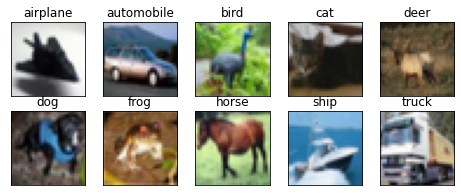

In [101]:
fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

Just like **CIFAR10**, the datasets submodule gives us precanned access to the most popular computer vision datasets, such as MNIST, Fashion-MNIST, CIFAR-100, SVHN, Coco, and Omniglot. In each case, the dataset is returned as a subclass of torch.utils.data.Dataset. We can see that the method-resolution order of our cifar10 instance includes it as a base class:

In [103]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [104]:
len(cifar10)

50000

In [105]:
len(cifar10_val)

10000

Since the dataset is equipped with the __getitem__ method, we can use the standard subscript for indexing tuples and lists to access individual items. Here, we get a PIL (Python Imaging Library, the PIL package) image with our desired output--an integer with the value 1, corresponding to “automobile”:

In [106]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F878E586490>,
 1,
 'automobile')

So, the sample in the data.CIFAR10 dataset is an instance of an RGB PIL image. We can plot it right away:

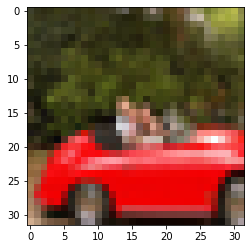

In [107]:
plt.imshow(img)
plt.show()

#**Transformations**

That’s all very nice, but we’ll likely need a way to convert the PIL image to a PyTorch tensor before we can do anything with it. That’s where torchvision.transforms comes in. This module defines a set of composable, function-like objects that can be passed as an argument to a torchvision dataset such as datasets.CIFAR10(...), and that perform transformations on the data after it is loaded but before it is returned by __getitem__. We can see the list of available objects as follows:

In [108]:
dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

Among those transforms, we can spot ToTensor, which turns NumPy arrays and PIL images to tensors. It also takes care to lay out the dimensions of the output tensor as C × H × W (channel, height, width). Let’s try out the ToTensor transform. Once instantiated, it can be called like a function with the PIL image as the argument, returning a tensor as output:

The image has been turned into a 3 × 32 × 32 tensor and therefore a 3-channel (RGB) 32 × 32 image. Note that nothing has happened to label; it is still an integer.


In [109]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

As we anticipated, we can pass the transform directly as an argument to dataset **.CIFAR10**:

In [111]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.ToTensor())

In [132]:
help(tensor_cifar10.data)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

In [122]:
type(tensor_cifar10)
tensor_cifar10.data.shape

(50000, 32, 32, 3)

In [131]:
tensor_cifar10[0][0].shape

torch.Size([3, 32, 32])

At this point, accessing an element of the dataset will return a tensor, rather than a PIL image:

In [124]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [125]:
img_t

tensor([[[0.2431, 0.1961,  ..., 0.7176, 0.5373],
         [0.2471, 0.2157,  ..., 0.6706, 0.5686],
         ...,
         [0.7176, 0.5882,  ..., 0.5294, 0.5608],
         [0.8196, 0.7137,  ..., 0.5098, 0.6627]],

        [[0.2510, 0.1961,  ..., 0.7216, 0.5333],
         [0.2549, 0.2078,  ..., 0.6824, 0.5725],
         ...,
         [0.5725, 0.4627,  ..., 0.4627, 0.4902],
         [0.6824, 0.5922,  ..., 0.4667, 0.6118]],

        [[0.1725, 0.1020,  ..., 0.2980, 0.2824],
         [0.1451, 0.1020,  ..., 0.2941, 0.3020],
         ...,
         [0.4588, 0.3725,  ..., 0.3843, 0.4314],
         [0.5647, 0.4824,  ..., 0.4353, 0.6275]]])

As expected, the shape has the channel as the first dimension, while the scalar type is float32:


In [126]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

Whereas the values in the original PIL image ranged from 0 to 255 (8 bits per channel), the ToTensor transform turns the data into a 32-bit floating-point per channel, scaling the values down from 0.0 to 1.0. Let’s verify that:


In [118]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

And let’s verify that we’re getting the same image. 

**img_t.permute**: Returns a view of the original tensor input with its dimensions permuted. Namely, changes the order of the axes from **C × H × W** to **H × W × C**. Parameters: 

**input (Tensor)** – the input tensor.

d**ims (tuple of python:ints)** – The desired ordering of dimensions

We have to use permute to change the order of the axes from C × H × W to H × W × C to match what Matplotlib expects.

As we can see in the plot, we get the same output as before.


In [123]:
img_t.shape

torch.Size([3, 32, 32])

In [120]:
img_t.permute(1, 2, 0)

tensor([[[0.2431, 0.2510, 0.1725],
         [0.1961, 0.1961, 0.1020],
         ...,
         [0.7176, 0.7216, 0.2980],
         [0.5373, 0.5333, 0.2824]],

        [[0.2471, 0.2549, 0.1451],
         [0.2157, 0.2078, 0.1020],
         ...,
         [0.6706, 0.6824, 0.2941],
         [0.5686, 0.5725, 0.3020]],

        ...,

        [[0.7176, 0.5725, 0.4588],
         [0.5882, 0.4627, 0.3725],
         ...,
         [0.5294, 0.4627, 0.3843],
         [0.5608, 0.4902, 0.4314]],

        [[0.8196, 0.6824, 0.5647],
         [0.7137, 0.5922, 0.4824],
         ...,
         [0.5098, 0.4667, 0.4353],
         [0.6627, 0.6118, 0.6275]]])

In [138]:
'''
from google.colab.patches import cv2_imshow
cv2_imshow(img_t.permute(1,2,0))
'''

AttributeError: ignored

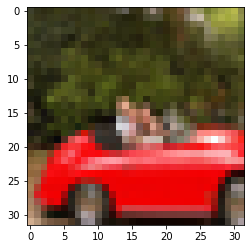

In [119]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

**Transforms** are really handy because we can chain them using transforms.Compose, and they can handle normalization and data augmentation transparently, directly in the data loader. For instance, it’s good practice to normalize the dataset so that each channel has zero mean and unitary standard deviation. By choosing activation functions that are linear around 0 plus or minus 1 (or 2), keeping the data in the same range means it’s more likely that neurons have nonzero gradients and, hence, will learn sooner. Also, normalizing each channel so that it has the same distribution will ensure that channel information can be mixed and updated through gradient descent using the same learning rate. In order to make it so that each channel has zero mean and unitary standard deviation, we can compute the mean value and the standard deviation of each channel across the dataset and apply the following transform: v_n[c] = (v[c] - mean[c]) / stdev[c]. This is what transforms.Normalize does. The values of mean and stdev must be computed offline (they are not computed by the transform). Let’s compute them for the CIFAR-10 training set. Since the CIFAR-10 dataset is small, we’ll be able to manipulate it entirely in memory. 

**torch.stack:**Concatenates a sequence of tensors along a new dimension.

**tensors (sequence of Tensors)** – sequence of tensors to concatenate

**dim (int) – dimension to insert.** Has to be between 0 and the number of dimensions of concatenated tensors (inclusive)

In [139]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

Now we can easily compute the mean per channel. Instead, view(3, -1) keeps the three channels and merges all the remaining dimensions into one, figuring out the appropriate size. Here our 3 × 32 × 32 image is transformed into a 3 × 1,024 vector, and then the mean is taken over the 1,024 elements of each channel.

**torch.tensor.view:** rurns a new tensor with the same data as the self tensor but of a different shape.

In [141]:
imgs.view(3, -1).mean(dim=1) 

tensor([0.4914, 0.4822, 0.4465])

Computing the standard deviation is similar:


In [142]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

**transforms.Normalize:** Normalize a tensor image with mean and standard deviation.

In [143]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

and concatenate it after the ToTensor transform:

In [ ]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Note that, at this point, plotting an image drawn from the dataset won’t provide us with a faithful representation of the actual image. The renormalized red car we get is shown in the figure. This is because normalization has shifted the RGB levels outside the 0.0 to 1.0 range and changed the overall magnitudes of the channels. All of the data is still there; it’s just that Matplotlib renders it as black. We’ll keep this in mind for the future.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


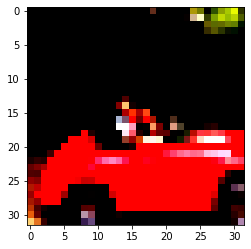

In [ ]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [144]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(data_path, train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



#**Pretrained Artificial Neural Networks**

TorchVision project (https://github.com/pytorch/vision)  contains a few of the best-performing neural network architectures for computer vision, such as AlexNet, ResNet, and Inception v3

The capitalized names refer to Python classes that implement a number of popular models. They differ in their architecture--that is, in the arrangement of the operations occurring between the input and the output. The lowercase names are convenience functions that return models instantiated from those classes, sometimes with different parameter sets. For instance, resnet101 returns an instance of ResNet with 101 layers, resnet18 has 18 layers, and so on. We’ll now turn our attention to AlexNet.

In [145]:
dir(models)

['AlexNet',
 'ConvNeXt',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 'VisionTransformer',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'convnext',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 '

In [146]:
alexnet = models.AlexNet()

In [147]:
resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [ ]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

We download all the needed test data

In [148]:
def data_download(file_to_download, gdrive_code, OS, uncompress = True):
  if not os.path.exists(file_to_download):
    os.system('gdown --id "'+gdrive_code+'" --output '+file_to_download)
    if OS == "Linux" and uncompress:
        os.system('unzip -o -n "./'+file_to_download+'" -d "./"')
    return True
  else: 
    return None

start_time = timeit.default_timer()
# Operating System
OS = platform.system()                           # returns 'Windows', 'Linux', etc

os.system('pip install --upgrade --no-cache-dir gdown')

out = data_download("./pytorch_test_data.zip", "1e5GoOB4a-FsRceRoHTC6oBBdt9aVbdfC", OS)

print("Elapsed Time: ", timeit.default_timer() - start_time)

Elapsed Time:  7.708696142000008


We can now grab a picture, preprocess it, and then see what ResNet thinks of it. We can start by loading an image from the local filesystem using Pillow, an image-manipulation module for Python.

In [149]:
img = Image.open("./bobby.jpg")

For a Jupyter Notebook, we would do the following to see the picture inline:

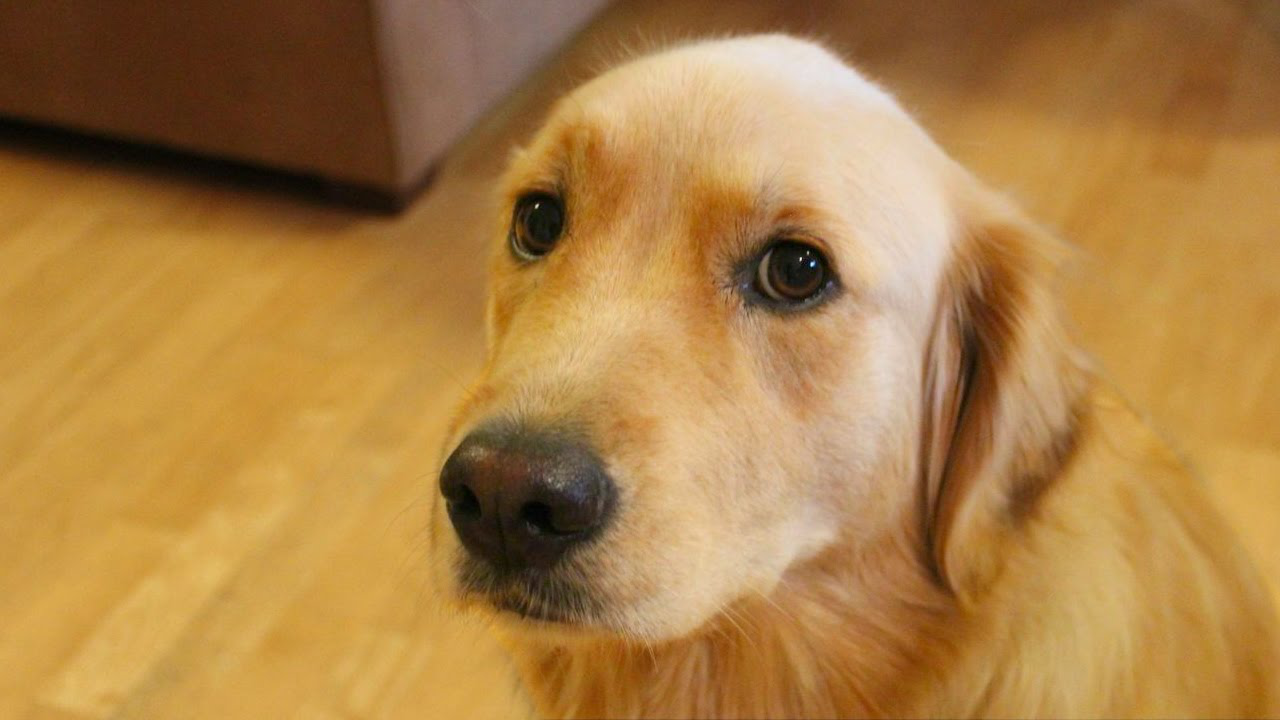

In [150]:
img

Otherwise, on the other platforms, we can invoke the show method, which will pop up a window with a viewer: 

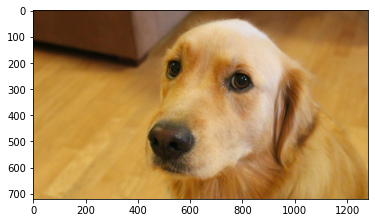

In [153]:
plt.imshow(img)
plt.show()

The resnet variable can be called like a function, taking as input one or more images and producing an equal number of scores for each of the 1,000 ImageNet classes. Before we can do that, however, we have to preprocess the input images so they are the right size and so that their values (colors) sit roughly in the same numerical range. In order to do that, the torchvision module provides transforms, which allow us to quickly define pipelines of basic preprocessing functions. In this case, we defined a preprocess function that will scale the input image to 256 × 256, crop the image to 224 × 224 around the center, transform it to a tensor (a PyTorch multidimensional array: in this case, a 3D array with color, height, and
width), and normalize its RGB (red, green, blue) components so that they have defined means and standard deviations. These need to match what was presented to the network during training, if we want the network to produce meaningful answers. We’ll go into more depth about transforms when we dive into making our own image-recognition models. 

**transforms.Resize:** resize the input image to the given size. If the image is torch Tensor, it is expected to have […, H, W] shape, where … means an arbitrary number of leading dimensions

**transforms.CenterCrop:** crops the given image at the center. If the image is torch Tensor, it is expected to have […, H, W] shape, where … means an arbitrary number of leading dimensions. If image size is smaller than output size along any edge, image is padded with 0 and then center cropped.

In [154]:
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

Next, we can pass the image through our preprocessing pipeline. Then we can reshape, crop, and normalize the input tensor in a way that the network expects.

In [155]:
img_t = preprocess(img)

**torch.unsqueeze:** Returns a new tensor with a dimension of size one inserted at the specified position.The returned tensor shares the same underlying data with this tensor. A dim value within the range [-input.dim() - 1, input.dim() + 1) can be used. Negative dim will correspond to unsqueeze() applied at dim = dim + input.dim() + 1.

**input (Tensor) –** the input tensor.

**dim (int) –**the index at which to insert the singleton dimension

In [156]:
batch_t = torch.unsqueeze(img_t, 0)
batch_t.shape

torch.Size([1, 3, 224, 224])

The process of running a trained model on new data is called inference in deep learning circles. In order to do inference, we need to put the network in eval mode. This is the Keras' **.predict**. 

In [157]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

If we forget to do that, some pretrained models, like batch normalization and dropout, will not produce meaningful answers, just because of the way they work internally. Now that eval has been set, we’re ready for inference:

In [158]:
out = resnet(batch_t)
out

tensor([[-3.4803e+00, -1.6618e+00, -2.4515e+00, -3.2662e+00, -3.2466e+00,
         -1.3611e+00, -2.0465e+00, -2.5112e+00, -1.3043e+00, -2.8900e+00,
         -1.6862e+00, -1.3055e+00, -2.6129e+00, -2.9645e+00, -2.4300e+00,
         -2.8143e+00, -3.3019e+00, -7.9404e-01, -6.5183e-01, -1.2308e+00,
         -3.0193e+00, -3.9457e+00, -2.2675e+00, -1.0811e+00, -1.0232e+00,
         -1.0442e+00, -3.0918e+00, -2.4613e+00, -2.1964e+00, -3.2354e+00,
         -3.3013e+00, -1.8553e+00, -2.0921e+00, -2.1327e+00, -1.9102e+00,
         -3.2403e+00, -1.1396e+00, -1.0925e+00, -1.2186e+00, -9.3332e-01,
         -4.5093e-01, -1.5489e+00,  1.4161e+00,  1.0871e-01, -1.8442e+00,
         -1.4806e+00,  9.6227e-01, -9.9456e-01, -3.0060e+00, -2.7384e+00,
         -2.5798e+00, -2.0666e+00, -1.8022e+00, -1.9328e+00, -1.7726e+00,
         -1.3041e+00, -4.5848e-01, -2.0537e+00, -3.2804e+00, -5.0451e-01,
         -3.8174e-01, -1.1147e+00, -7.3998e-01, -1.4299e+00, -1.4883e+00,
         -2.1073e+00, -1.7373e+00, -4.

In [159]:
out.shape

torch.Size([1, 1000])

A staggering set of operations involving 44.5 million parameters has just happened, producing a vector of 1,000 scores, one per ImageNet class. That didn’t take long, did it? We now need to find out the label of the class that received the highest score. This will tell us what the model saw in the image. If the label matches how
a human would describe the image, that’s great! It means everything is working. If not, then either something went wrong during training, or the image is so different from what the model expects that the model can’t process it properly, or there’s some other similar issue. To see the list of predicted labels, we will load a text file listing the labels in the same order they were presented to the network during training, and then we will pick out the label at the index that produced the highest score from the network. Almost all models meant for image recognition have output in a form similar to what we’re about to work with. Let’s load the file containing the 1,000 labels for the ImageNet dataset classes:

In [160]:
with open('./imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

At this point, we need to determine the index corresponding to the maximum score in the out tensor we obtained previously. We can do that using the max function in PyTorch, which outputs the maximum value in a tensor as well as the indices where that maximum value occurred:

In [161]:
max_value, index = torch.max(out, 1)

In [162]:
max_value

tensor([15.6744], grad_fn=<MaxBackward0>)

In [163]:
index

tensor([207])

We can now use the index to access the label. Here, index is not a plain Python number, but a one-element, one-dimensional tensor, so we need to get the actual numerical value to use as an index into our labels list using index[0]. We also use torch.nn.functional.softmax  to normalize our outputs to the range [0, 1], and divide by the sum. That gives us something roughly akin to the confidence that the model has in its prediction. In this case, the model is 96% certain that it knows what it’s looking at is a golden retriever. 

**torch.nn.functional.softmax:** Applies a softmax function. It is applied to all slices along dim, and will re-scale them so that the elements lie in the range [0, 1] and sum to 1.

**input (Tensor) –** input

**dim (int) –** A dimension along which softmax will be computed.

**dtype (torch.dtype, optional) –**the desired data type of returned tensor. If specified, the input tensor is casted to dtype before the operation is performed. This is useful for preventing data type overflows. Default: None.

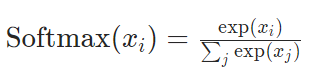

In [164]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 96.29335021972656)

Since the model produced scores, we can also find out what the second best, third best, and so on were. To do this, we can use the sort function, which sorts the values in ascending or descending order and also provides the indices of the sorted values in the original array:

In [ ]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 96.29335021972656),
 ('Labrador retriever', 2.8081188201904297),
 ('cocker spaniel, English cocker spaniel, cocker', 0.2826734781265259),
 ('redbone', 0.2086300402879715),
 ('tennis ball', 0.11621593683958054)]

We see that the first four are dogs (redbone is a breed; who knew?), after which things start to get funny. The fifth answer, “tennis ball,” is probably because there are enough pictures of tennis balls with dogs nearby that the model is essentially saying, “There’s a 0.1% chance that I’ve completely misunderstood what a tennis ball is.” This is a great example of the fundamental differences in how humans and neural networks view the world, as well as how easy it is for strange, subtle biases to sneak into our data.

#**Homeworks**

1) Create a tensor a from list(range(9)). Predict and then check the size. 
Create a new tensor using b = a.view(3, 3). 
What does view do? Check that a and b share the same storage.

2) Use torchvision to implement random cropping of the from Garbage or EuroSAT Dataset. How are the resulting images different from the uncropped originals? What happens when you request the same image a second time? 